<a href="https://colab.research.google.com/github/carlamaziero/Reconhecimento_padroes/blob/main/Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)
print(X.shape, y.shape)

(442, 10) (442,)


In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(n_features=1)
X.shape, y.shape

((100, 1), (100,))

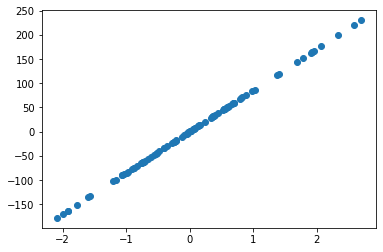

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

75.95295291633313


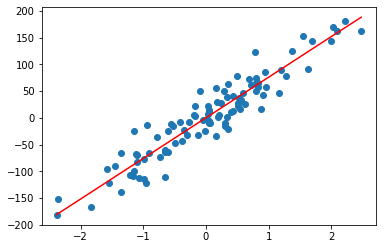

In [4]:
X, y, coef = make_regression(n_features=1, noise=30, coef=True, random_state=4)
print(coef)
xmin, xmax = min(X), max(X)
plt.scatter(X, y)
plt.plot([xmin, xmax], [xmin, xmax]*coef, c='r')
plt.show()

In [5]:
def modelo_linear(X, coef):
  y = X*coef
  return y.reshape(-1,)
ypred = modelo_linear(X, coef)
ypred.shape

(100,)

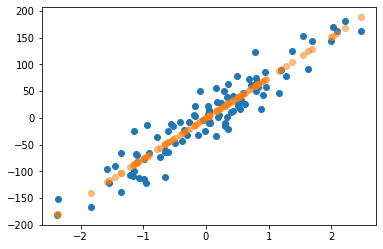

In [6]:
plt.scatter(X, y)
plt.scatter(X, modelo_linear(X, coef), alpha=0.5)
plt.show()

In [7]:
import numpy as np

def mae(y, ypred):
  ydif = ypred - y
  yabs = abs(ydif)
  esum = np.sum(yabs)
  mae = esum/len(yabs)
  return mae

ypred = modelo_linear(X, coef)
mae(y, ypred)

20.636951137353734

In [8]:
def mse(y, ypred):
  ydif = ypred - y
  ysqr = ydif**2
  esum = np.sum(ysqr)
  mse = esum/len(ysqr)
  return mse

ypred = modelo_linear(X, coef)
mse(y, ypred)

655.5657700738702

In [9]:
from sklearn.metrics import mean_squared_error
def rmse(y, ypred):
  return np.sqrt(mean_squared_error(y, ypred))

ypred = modelo_linear(X, coef)
rmse(y, ypred)

25.60401863133735

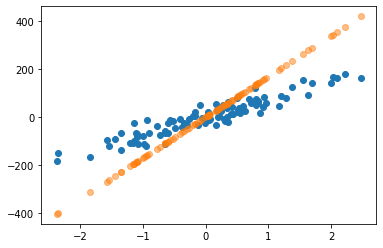

96.41637737688768

In [10]:
class RegressãoLinear():
  def __init__(self):
    self.coef_ = np.random.uniform(-100, 200, (1,))

  def predict(self, X):
    y = X*self.coef_
    return y.reshape(-1,)

modelo = RegressãoLinear()
ypred = modelo.predict(X)
plt.scatter(X, y)
plt.scatter(X, ypred, alpha=0.5)
plt.show()
rmse(y, ypred)

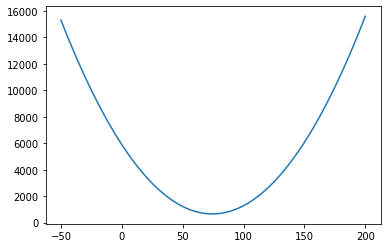

In [11]:
coefs = np.linspace(-50, 200, 100)
mses = []
modelo = RegressãoLinear()
for coef in coefs:
  modelo.coef_ = coef
  ypred = modelo.predict(X)
  mse = mean_squared_error(y, ypred)
  mses.append(mse)
plt.plot(coefs, mses)
plt.show()

In [12]:
def mse_c(coef):
  modelo = RegressãoLinear()
  modelo.coef_ = coef
  ypred = modelo.predict(X)
  return mean_squared_error(y, ypred)

mse_c(50)

1217.5488429385516

In [13]:
def derivada(função, valor):
  h = 0.0000000001
  return (função(valor+h) - função(valor))/h

derivada(mse_c, 50), derivada(mse_c, 100)

(-46.252353058662266, 48.52836354984902)

In [14]:
from scipy.misc import derivative
derivative(mse_c, 50), derivative(mse_c, 100)

(-46.252257334948695, 48.52825188539771)

In [15]:
def derivada_mse_c(coef):
  modelo = RegressãoLinear()
  modelo.coef_ = coef
  ypred = modelo.predict(X)
  erro = ypred - y
  return 2*np.mean(X * erro.reshape(-1,1))

derivada_mse_c(50), derivada_mse_c(100)

(-46.25225733494862, 48.528251885397765)

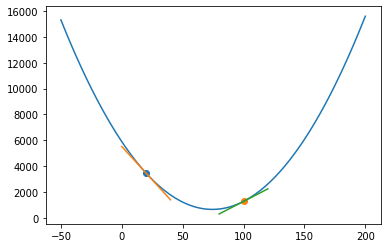

In [16]:
def vet_deriv(coef, offset=0):
  center = derivada_mse_c(coef)
  x = coef+np.array(offset)
  return x, center*(x-coef)+mse_c(coef)

def plot_vet(coef, offset):
  plt.scatter(*vet_deriv(coef))
  plt.plot(*vet_deriv(coef,[-offset,offset]))

plt.plot(coefs, mses)
plot_vet(20, 20)
plot_vet(100,20)
plt.show()

In [17]:
modelo.coef_ = 74.39966705
ypred = modelo.predict(X)
erro = ypred - y
deriv = np.mean(X * erro)
deriv

0.022835291885205673

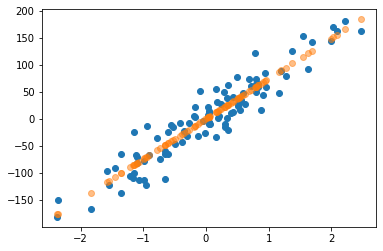

(25.5593232217714, array([74.39966691]))

In [18]:
class RegressãoLinear():
  def __init__(self, learning_rate=.1, max_iter=100):
    self.learning_rate = learning_rate
    self.max_iter = max_iter
    self.coef_hist = []
  
  def fit(self, X, y):
    self.coef_ = np.random.uniform(-200,200,(1,))
    for _ in range(self.max_iter):
      ypred = self.predict(X)
      erro = ypred - y
      ajuste = 2*np.mean(X * erro.reshape(-1,1))
      self.coef_ -= ajuste*self.learning_rate
      self.coef_hist.append(self.coef_.copy())

  def predict(self, X):
    y = X*self.coef_
    return y.reshape(-1,)

modelo = RegressãoLinear()
modelo.fit(X, y)
ypred = modelo.predict(X)
plt.scatter(X, y)
plt.scatter(X, ypred, alpha=0.5)
plt.show()
rmse(y, ypred), modelo.coef_

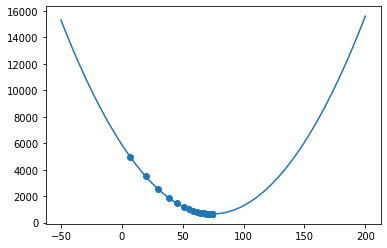

In [20]:
modelo = RegressãoLinear(learning_rate=.1, max_iter=100)
modelo.fit(X, y)

plt.plot(coefs, mses)
plt.scatter(modelo.coef_hist, [mse_c(coef) for coef in modelo.coef_hist])
plt.show()

75.95295291633313 -40


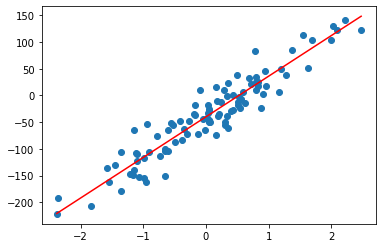

In [21]:
import random
random.seed(4)
bias = random.randint(-100,100)
X, y, coef = make_regression(n_features=1, noise=30, coef=True, random_state=4, 
                             bias=bias)
print(coef, bias)
xmin, xmax = min(X), max(X)
plt.scatter(X, y)
plt.plot([xmin, xmax], [xmin, xmax]*coef+bias, c='r')
plt.show()

In [22]:
def modelo_linear(X, coef, intercept):
  y = X * coef + intercept
  return y.reshape(-1,)

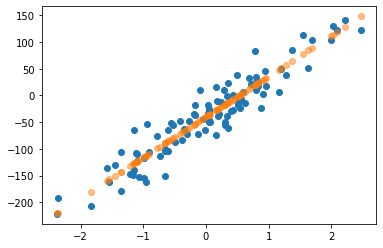

In [23]:
plt.scatter(X, y)
plt.scatter(X, modelo_linear(X, coef, bias), alpha=0.5)
plt.show()

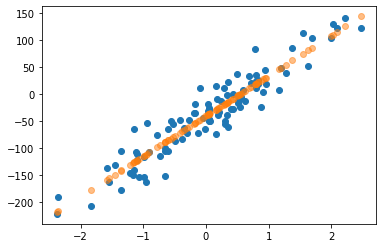

(25.551112619550555, array([[-40.64822764],
        [ 74.42379152]]))

In [24]:
class RegressãoLinear():
  def __init__(self, learning_rate=.01, max_iter=100):
    self.learning_rate = learning_rate
    self.max_iter = max_iter
    self.coef_hist = []
  
  def fit(self, X, y):
    Xb = np.concatenate((np.ones((X.shape[0],1)), X),axis=1)
    self.coef_ = np.random.uniform(-100,100,(Xb.shape[1],1))
    for _ in range(self.max_iter):
      ypred = self.predict(X)
      erro = ypred - y
      ajuste = Xb.T.dot(erro.reshape(-1,1))
      self.coef_ -= ajuste*self.learning_rate
      self.coef_hist.append(self.coef_.copy())

  def predict(self, X):
    Xb = np.concatenate((np.ones((X.shape[0],1)), X),axis=1)
    y = Xb.dot(self.coef_)
    return y.reshape(-1,)

modelo = RegressãoLinear()
modelo.fit(X, y)
ypred = modelo.predict(X)
plt.scatter(X, y)
plt.scatter(X, ypred, alpha=0.5)
plt.show()
rmse(y, ypred), modelo.coef_

In [25]:
X, y = make_regression(noise=30, bias=random.randint(-100,100))

In [26]:
from scipy.linalg import pinv

class RegressãoLinear():  
  def fit(self, X, y):
    Xb = np.concatenate((np.ones((X.shape[0],1)), X),axis=1)
    self.coef_ = np.matmul(pinv(Xb), y)

  def predict(self, X):
    Xb = np.concatenate((np.ones((X.shape[0],1)), X),axis=1)
    y = Xb.dot(self.coef_)
    return y.reshape(-1,)

modelo = RegressãoLinear()
modelo.fit(X, y)
ypred = modelo.predict(X)
rmse(y, ypred)

5.752214165546086e-13